# Analyzing Flight's Status with Pandas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Enable inline plotting
%matplotlib inline

# Read OnTime/Delay csv data.
path = r'C:\Users\Carlo\Documents\CUNY_SPS\DataAcquisition\Week_3\Flight_Status.csv'
csv = pd.read_csv(path)

## Original Data

`The original set of data is structure as below`

In [2]:
csv

,AIRLINE,STATUS,CITY,AMOUNT
0,ALASKA,ontime,Los Angeles,497
1,ALASKA,ontime,Phoenix,221
2,ALASKA,ontime,San Diego,212
3,ALASKA,ontime,San Francisco,503
4,ALASKA,ontime,Seattle,1841
5,ALASKA,delayed,Los Angeles,62
6,ALASKA,delayed,Phoenix,12
7,ALASKA,delayed,San Diego,20
8,ALASKA,delayed,San Francisco,102
9,ALASKA,delayed,Seattle,305


### Filter delayed Flights.

In [3]:
delays = csv.loc[csv['STATUS'] == 'delayed']
delays

,AIRLINE,STATUS,CITY,AMOUNT
5,ALASKA,delayed,Los Angeles,62
6,ALASKA,delayed,Phoenix,12
7,ALASKA,delayed,San Diego,20
8,ALASKA,delayed,San Francisco,102
9,ALASKA,delayed,Seattle,305
15,AM WEST,delayed,Los Angeles,117
16,AM WEST,delayed,Phoenix,415
17,AM WEST,delayed,San Diego,65
18,AM WEST,delayed,San Francisco,129
19,AM WEST,delayed,Seattle,61


## Ordered Set

`Flight's data ordered by delays and number of flights (amount) in descending order.`

In [4]:
sort_by_amount = delays.sort_values(['AMOUNT'], ascending=False)
sort_by_amount

,AIRLINE,STATUS,CITY,AMOUNT
16,AM WEST,delayed,Phoenix,415
9,ALASKA,delayed,Seattle,305
18,AM WEST,delayed,San Francisco,129
15,AM WEST,delayed,Los Angeles,117
8,ALASKA,delayed,San Francisco,102
17,AM WEST,delayed,San Diego,65
5,ALASKA,delayed,Los Angeles,62
19,AM WEST,delayed,Seattle,61
7,ALASKA,delayed,San Diego,20
6,ALASKA,delayed,Phoenix,12


### Top three cities with most delayed flights.

In [5]:
top_3 = sort_by_amount.head(3)
top_3

,AIRLINE,STATUS,CITY,AMOUNT
16,AM WEST,delayed,Phoenix,415
9,ALASKA,delayed,Seattle,305
18,AM WEST,delayed,San Francisco,129


### Airline comparison of delayed flight by city.

In [11]:
pivot = pd.pivot_table(sort_by_amount, index='CITY', columns='AIRLINE')
pivot

AMOUNT        
AIRLINE       ALASKA AM WEST
CITY                        
Los Angeles       62     117
Phoenix           12     415
San Diego         20      65
San Francisco    102     129
Seattle          305      61

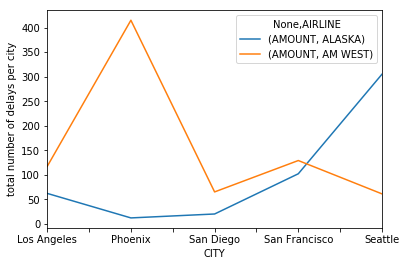

In [12]:
pivot.plot()
plt.ylabel('total number of delays per city');